### Linear Regression with Python Scikit Learn

problem: predection marks a student can score based on no. of hourse study.

#### Import all libraries required for this problem

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Loadind Dataset

In [6]:
path="http://bit.ly/w-data"
data=pd.read_csv(path)
print("Data import successfully")

Data import successfully


In [7]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Getting Data information

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Checking The Null Values

In [10]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### split the dataset into dependent and independent variable:

In [11]:
marks=data.drop("Scores",axis="columns")
duration=data.drop("Hours",axis="columns")

In [12]:
marks.shape

(25, 1)

In [13]:
duration.shape

(25, 1)

#### Train test split

In [14]:
from sklearn.model_selection import train_test_split
marks_train,marks_test,duration_train,duration_test=train_test_split(marks,duration,test_size=0.2,random_state=0)

In [15]:
marks_train.shape

(20, 1)

In [16]:
duration_train.shape

(20, 1)

In [18]:
duration_test.shape

(5, 1)

In [19]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(marks_train,duration_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### printing slope value (y=mx+c)

In [20]:
lr.coef_[0][0].round(2)

9.91

#### Printing intercept Value(y=mx+c)

In [21]:
lr.intercept_[0],round(2)

(2.018160041434683, 2)

In [22]:
m=9.91
c=2.02
y=m*9.25+c
y

93.6875

In [23]:
lr.predict([[9.25]]).round(2)

array([[93.69]])

In [25]:
score_pred=lr.predict(marks_test)
pd.DataFrame(np.c_[marks_test,duration_test,score_pred],columns=["Hours","originalscore","predicted score"])

,Hours,originalscore,predicted score
0,1.5,20.0,16.884145
1,3.2,27.0,33.732261
2,7.4,69.0,75.357018
3,2.5,30.0,26.794801
4,5.9,62.0,60.491033


In [26]:
lr.score(marks_test,duration_test)

0.9454906892105356

#### Select a model and train it:

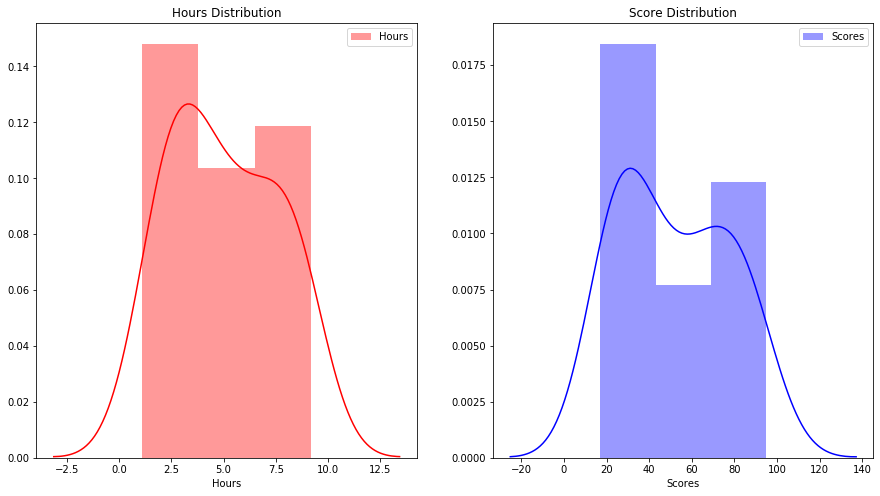

In [29]:
graph=plt.figure(figsize=(15,8))
g1=graph.add_subplot(121)
g2=graph.add_subplot(122)
g1.set_title('Hours Distribution')
g2.set_title('Score Distribution')
p1=sns.distplot(data['Hours'],label='Hours',ax=g1,color='red')
p2=sns.distplot(data['Scores'],label='Scores',ax=g2,color='blue')
p1.legend()
p2.legend()

#### Visualizing Relationship between the varibles

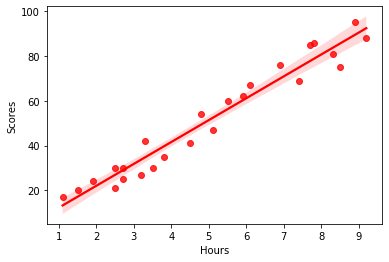

In [30]:
sns.regplot(x=data['Hours'],y=data['Scores'],color='r')

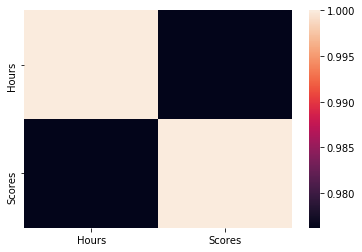

In [31]:
corr=data.corr()
sns.heatmap(corr)

there is a strong positive relationship between scores and hours.

#### Testing the model

In [32]:
import pickle
pickle.dump(lr,open('Task1.pk','wb'))

In [34]:
model=pickle.load(open('Task1.pk','rb'))
print(model.predict([[9.25]]))

[[93.69173249]]


After Studying for 9.25 hours, The Expected Score should be 93.6917.